<a href="https://colab.research.google.com/github/migo2555/ml-product-category-prediction-based-on-title-/blob/main/notebook/product_category_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Product Category Prediction Based on Product Title  

**Notebook:** `product_category_prediction.ipynb`  
**Project:** `ml-product-category-prediction-based-on-title-`

**Author:** `Jovic Miodrag`

This project focuses on building a Machine Learning model that predicts the product category based solely on the product title.  
The dataset contains product listings, including their titles and associated categories.  
The goal is to analyze the text data, preprocess it, extract features, and train an ML model capable of accurately predicting product categories.


## Step 1 — Load Dataset from GitHub

In this first step, we load the dataset directly from the GitHub repository using its raw file URL.  
We use `pandas` to read the CSV file into a DataFrame and display basic information such as:

- total number of rows  
- the first few rows of the dataset  

This allows us to verify that the data was successfully loaded and to understand its structure before performing any preprocessing or modeling.

In [4]:
import pandas as pd

# load data from GitHub
url = "https://raw.githubusercontent.com/migo2555/ml-product-category-prediction-based-on-title-/main/data/TASK_03-products.csv"

df = pd.read_csv(url)

print("Number of rows:", len(df))
print("First 5 rows:")
print(df.head())


Number of rows: 35311
First 5 rows:
   product ID                                      Product Title  Merchant ID  \
0           1                    apple iphone 8 plus 64gb silver            1   
1           2                apple iphone 8 plus 64 gb spacegrau            2   
2           3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...            3   
3           4                apple iphone 8 plus 64gb space grey            4   
4           5  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...            5   

   Category Label _Product Code  Number_of_Views  Merchant Rating  \
0   Mobile Phones    QA-2276-XC            860.0              2.5   
1   Mobile Phones    KA-2501-QO           3772.0              4.8   
2   Mobile Phones    FP-8086-IE           3092.0              3.9   
3   Mobile Phones    YI-0086-US            466.0              3.4   
4   Mobile Phones    NZ-3586-WP           4426.0              1.6   

   Listing Date    
0       5/10/2024  
1      12/31/2024  
2 

##  Step 2 — Exploring the Dataset

In this step, we perform a quick exploratory check of the dataset:

 **Dataset shape** — prints the number of rows and columns to understand the dataset size.  
 **First 5 rows** — displays the first few records to get an overview of the data.  
 **Dataset info** — shows column names, data types, and non-null counts to identify missing values and understand data types.


In [5]:
# Print shape (number of rows and columns)
print("Dataset shape (rows, columns):", df.shape)

# Show first 5 rows
print("\nFirst 5 rows:")
display(df.head())

# Show column data types and non-null counts
print("\nDataset info:")
df.info()


Dataset shape (rows, columns): (35311, 8)

First 5 rows:


,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product ID       35311 non-null  int64  
 1   Product Title    35139 non-null  object 
 2   Merchant ID      35311 non-null  int64  
 3    Category Label  35267 non-null  object 
 4   _Product Code    35216 non-null  object 
 5   Number_of_Views  35297 non-null  float64
 6   Merchant Rating  35141 non-null  float64
 7    Listing Date    35252 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.2+ MB


**Result Highlights:**
- The dataset contains **35,311 rows** and **8 columns**.  
- Some columns, like `Product Title`, `Category Label`, `_Product Code`, `Number_of_Views`, `Merchant Rating`, and `Listing Date`, have **missing values**.  
- The data types are a mix of **integers, floats, and objects (strings)**.  

This initial exploration helps us identify columns that may need cleaning or preprocessing in the next step.

## Step 3 — Checking Missing Values

In this step, we check for **missing values** in the dataset.  
The code below counts the number of missing (NaN) values for each column using `df.isna().sum()`.  

This helps identify which columns require **data cleaning or imputation** before training the ML model.


In [6]:
# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


## Step 4 — Visualizing Missing Values

In this step, we create a **heatmap** to visualize missing values in the dataset.  
Using `seaborn` and `matplotlib`, the heatmap highlights which rows and columns contain NaN values, making it easier to spot patterns of missing data.  

This visual check complements the previous step where we counted missing values per column.


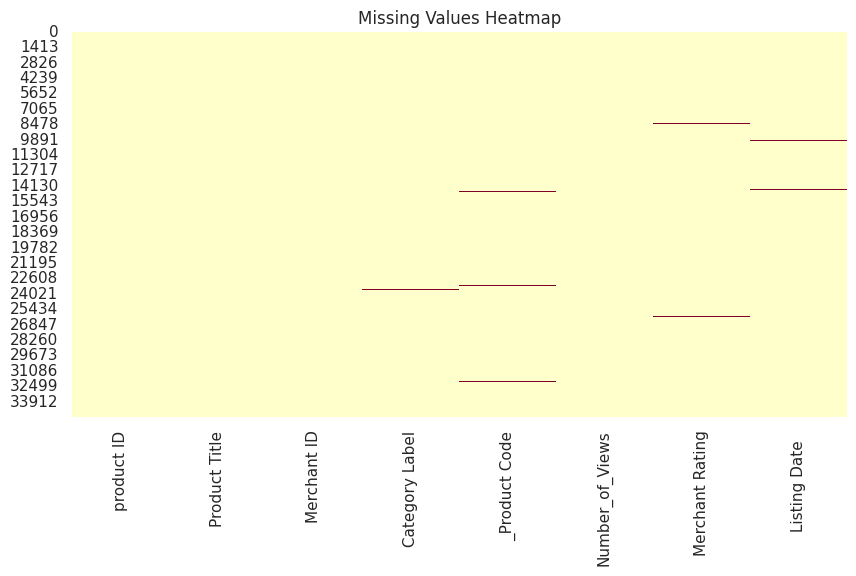

In [7]:
# Visualize missing data with seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()


## Step 5 — Visualize Missing Values

In this step, we visualize the missing values in the dataset.  

1. **Bar chart (Matplotlib)** — shows the number of missing values per column.  
2. **Colored bar chart (optional / enhanced)** — uses different colors to make columns with missing values easier to distinguish.  

This step helps identify problematic columns and guides decisions for data cleaning before model training.


In [8]:
# Count missing values per column
missing_counts = df.isna().sum()

print("Missing values per column:")
print(missing_counts)

Missing values per column:
product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


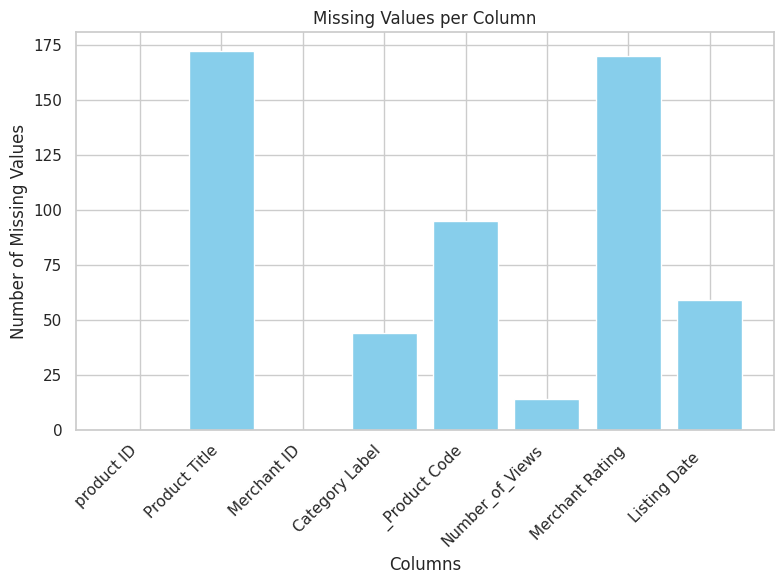

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count missing values per column
missing_counts = df.isna().sum()

# Plot missing values as a bar chart
plt.figure(figsize=(8,6))
plt.bar(x=missing_counts.index, height=missing_counts.values, color='skyblue')
plt.title("Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45, ha='right')  # Rotira nazive kolona radi preglednosti
plt.tight_layout()
plt.show()

## Step 6 - Cleaning Column Names

The code below removes any leading or trailing spaces from the column names.
This ensures consistent naming and prevents errors when accessing columns later in the workflow.

In [10]:
df.columns = df.columns.str.strip()

print("Cleaned column names:")
print(df.columns.tolist())

Cleaned column names:
['product ID', 'Product Title', 'Merchant ID', 'Category Label', '_Product Code', 'Number_of_Views', 'Merchant Rating', 'Listing Date']


## Step 7 — Cleaning and Preprocessing the Dataset

This step performs essential data-cleaning operations to prepare the dataset for modeling.
The preprocessing includes:

- Renaming columns for consistency and easier use in code.

- Handling missing values:

    - Numeric columns are filled with the median.

    - Text columns are filled with the placeholder "Unknown".

- Removing rows with missing target labels (Category_Label).

- Standardizing text columns by converting them to lowercase and stripping extra spaces.

- Converting the date column (Listing_Date) into a proper datetime format.

These operations ensure that the dataset is clean, consistent, and ready for the next stage—feature engineering and model training.

In [11]:
import pandas as pd

# Rename columns for easier access
df = df.rename(columns={
    'Product Title': 'Product_Title',
    'Category Label': 'Category_Label',
    '_Product Code': 'Product_Code',
    'Merchant Rating': 'Merchant_Rating',
    'Listing Date': 'Listing_Date'
})

# Drop all rows with missing values
df = df.dropna()

# Define numeric and text columns
numeric_cols = ['Number_of_Views', 'Merchant_Rating']
text_cols = ['Product_Title', 'Product_Code']

# Fill missing numeric values with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill missing text values with "unknown"
for col in text_cols:
    df[col] = df[col].fillna("unknown")

# Convert Listing_Date to datetime; missing values become NaT
df['Listing_Date'] = pd.to_datetime(df['Listing_Date'], errors='coerce')

# Drop rows with missing target category
df = df.dropna(subset=['Category_Label'])

# 8. Standardize text columns to lowercase and strip whitespace
for col in ['Product_Title', 'Category_Label', 'Product_Code']:
    df[col] = df[col].str.lower().str.strip()

# Show final dataset info
print("Cleaned dataset info:")
df.info()

print("\nCleaned dataset head:")
display(df.head())


Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 34760 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   product ID       34760 non-null  int64         
 1   Product_Title    34760 non-null  object        
 2   Merchant ID      34760 non-null  int64         
 3   Category_Label   34760 non-null  object        
 4   Product_Code     34760 non-null  object        
 5   Number_of_Views  34760 non-null  float64       
 6   Merchant_Rating  34760 non-null  float64       
 7   Listing_Date     34760 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 2.4+ MB

Cleaned dataset head:


,product ID,Product_Title,Merchant ID,Category_Label,Product_Code,Number_of_Views,Merchant_Rating,Listing_Date
0,1,apple iphone 8 plus 64gb silver,1,mobile phones,qa-2276-xc,860.0,2.5,2024-05-10
1,2,apple iphone 8 plus 64 gb spacegrau,2,mobile phones,ka-2501-qo,3772.0,4.8,2024-12-31
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,mobile phones,fp-8086-ie,3092.0,3.9,2024-11-10
3,4,apple iphone 8 plus 64gb space grey,4,mobile phones,yi-0086-us,466.0,3.4,2022-05-02
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,mobile phones,nz-3586-wp,4426.0,1.6,2023-04-12


## Summary:

The dataset has been thoroughly cleaned: numeric missing values were imputed with medians, text fields with "Unknown", textual data standardized, and the date column converted to datetime. Rows missing the target label were removed, resulting in 35,208 complete records.

## Step 8 - Dataset Overview

Check the new shape of the dataset and verify that there are no missing values in the columns.


In [12]:
# Display new shape of the dataset
print("New dataset shape:", df.shape)

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

New dataset shape: (34760, 8)
Missing values per column:
product ID         0
Product_Title      0
Merchant ID        0
Category_Label     0
Product_Code       0
Number_of_Views    0
Merchant_Rating    0
Listing_Date       0
dtype: int64


## Random Sample of Product Titles  

This cell displays 20 randomly selected product titles from the dataset.  
It helps to get a quick sense of the diversity and format of product names, which is useful for feature engineering and understanding the text data.


In [13]:
df['Product_Title'].sample(20).tolist()

['praktica luxmedia z35 16 mp bridge camera black',
 'olympus om d e m10 mark iii compact system camera double zoom lens kit silver',
 'apple iphone 8 plus 256gb schwarz smartphone',
 'washing machine',
 'smeg st733tl dishwasher',
 'miele wwe320powerwash ultra efficient 8kg 1400rpm freestanding washing machine with powerwash white',
 'hotpoint hza1 built in freezer white',
 'samsung wf80f5e0w2w washing machine',
 'beko dfs05010w 10 place slimline freestanding dishwasher white',
 'miele wce660 8kg w1 twindos washing machine 1400rpm white',
 'siemens sn636x01ge geschirrsp ler vollintegriert 60cm',
 'miele g4680scvi fully integrated 9 place slimline dishwasher',
 'smeg fridges and freezers fab32lven1 220 240 v',
 'liebherr uik1550 integrated fridges',
 'liebherr einbauk hlschrank ikbp3520 20',
 'bosch wdu28568gb 1400rpm 10 6kg serie 6 washer dryer silver',
 'prestigio multiphone 5451 duo sim free smartphone white',
 '1400rpm washing machine 7kg load class a white',
 'aeg mbe2657dm',
 'mot

## Step 9 - Feature Engineering on Product Titles

This step extracts useful features from the `Product_Title` column to improve model performance:

- `title_word_count`: Number of words in the product title  
- `title_char_count`: Number of characters in the product title  
- `digit_count`: Count of numeric digits in the title  
- `brand`: First word of the title, often representing the brand  
- `has_4k`, `has_led`, `has_usb`: Binary features indicating the presence of key technical terms  

These features help capture additional information beyond the raw product title, providing the model with richer context for category prediction.


In [14]:
# Word count in product title
df['title_word_count'] = df['Product_Title'].str.split().apply(len)

# Character count in product title
df['title_char_count'] = df['Product_Title'].str.len()

# Number of digits in product title
df['digit_count'] = df['Product_Title'].str.count(r'\d')

# Extract brand (first word in the title)
df['brand'] = df['Product_Title'].str.split().str[0].str.lower()

# Key technical terms (example: 4K, LED, USB)
df['has_4k'] = df['Product_Title'].str.contains(r'\b4k\b', case=False, regex=True).astype(int)
df['has_led'] = df['Product_Title'].str.contains(r'\bled\b', case=False, regex=True).astype(int)
df['has_usb'] = df['Product_Title'].str.contains(r'\busb\b', case=False, regex=True).astype(int)

# Display the first few rows to verify
print("Dataset with key engineered features:")
display(df.sample(20))


Dataset with key engineered features:


,product ID,Product_Title,Merchant ID,Category_Label,Product_Code,Number_of_Views,Merchant_Rating,Listing_Date,title_word_count,title_char_count,digit_count,brand,has_4k,has_led,has_usb
23654,34359,samsung ecobubble ww80j5555fx/eu 8 kg 1400 spi...,7,washing machines,us-2641-fz,651.0,3.1,2023-12-30,10,72,11,samsung,0,0,0
33015,44897,zanussi zrx51100wa compact fridge with icebox,294,fridges,yk-7511-sm,1950.0,2.7,2024-02-27,6,45,5,zanussi,0,0,0
17127,26966,aeg comfortlift integrated dishwasher in silver,31,dishwashers,fw-1519-vv,1825.0,2.3,2024-05-27,6,47,0,aeg,0,0,0
23372,34059,hotpoint rsg845jx 8kg 1400rpm freestanding was...,6,washing machines,ko-4878-az,2327.0,1.7,2024-07-05,8,64,8,hotpoint,0,0,0
15212,24894,morphy richards evoke free standing microwave ...,31,microwaves,ea-7568-nm,2827.0,4.4,2023-10-18,9,59,0,morphy,0,0,0
13617,23177,rollei historyline 98 compact camera digital c...,17,digital cameras,co-2069-tm,4051.0,2.7,2022-06-28,24,142,13,rollei,0,0,0
8421,14548,intel xeon gold 6142 2.60ghz fc lga14 22mb tra...,36,cpus,kd-5907-xt,968.0,2.0,2022-05-31,18,99,30,intel,0,0,0
2419,2427,stk tra1gd/eu transporter 1 dual sim smartphon...,3,mobile phones,he-7001-tm,2757.0,2.6,2023-07-13,8,53,2,stk,0,0,0
14549,24160,bosch hmt75m421b compact microwave,292,microwaves,ge-1684-zh,398.0,3.6,2023-10-10,4,34,5,bosch,0,0,0
16188,25929,smeg mp422x cucina stainless steel microwave oven,293,microwaves,ym-1911-wf,3255.0,3.7,2024-06-23,7,49,3,smeg,0,0,0


## Step 10 — Outlier Detection with Seaborn Boxplots

This step uses seaborn boxplots to visually inspect potential outliers in numerical features like product views and merchant ratings.

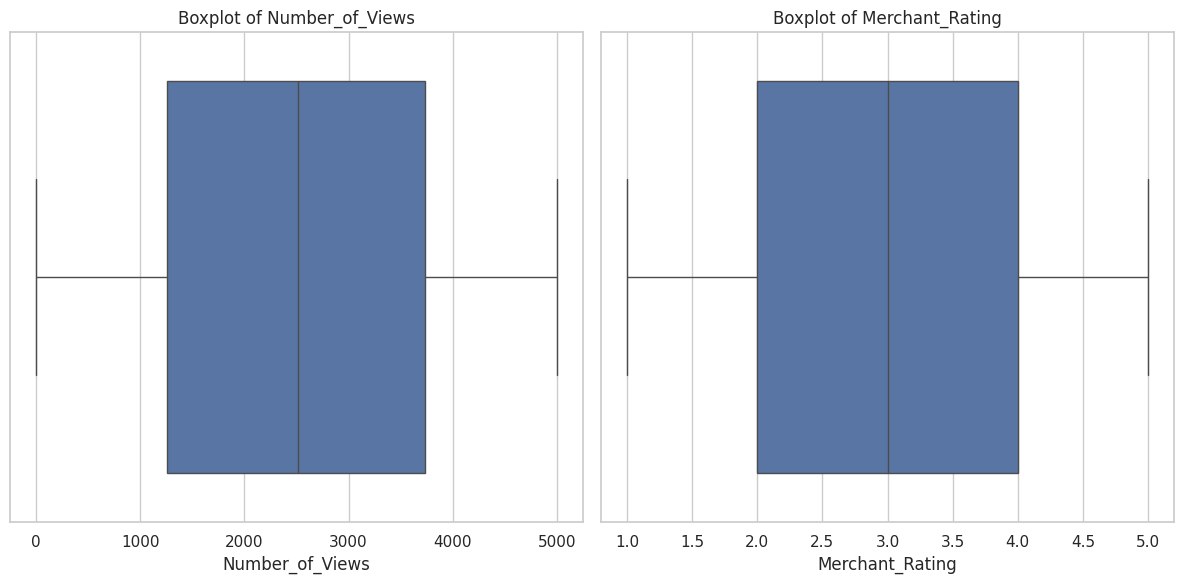

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

features = ['Number_of_Views', 'Merchant_Rating']

for i, col in enumerate(features, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=df[col], orient="h")
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


## Boxplot Analysis

Boxplots show that Number_of_Views has a wide spread (≈1250–3800) with a median around 2500, indicating varying product popularity and a few high-value outliers.
Merchant_Rating is more stable, ranging from 2 to 4 with a median near 3, showing that most sellers have average ratings and very few extreme values.

## Step 11 — Top 20 Brands Distribution

Bar chart shows the distribution of the 20 most frequent brands in the dataset. This helps identify which brands dominate the listings and provides insights into potential class imbalance in modeling

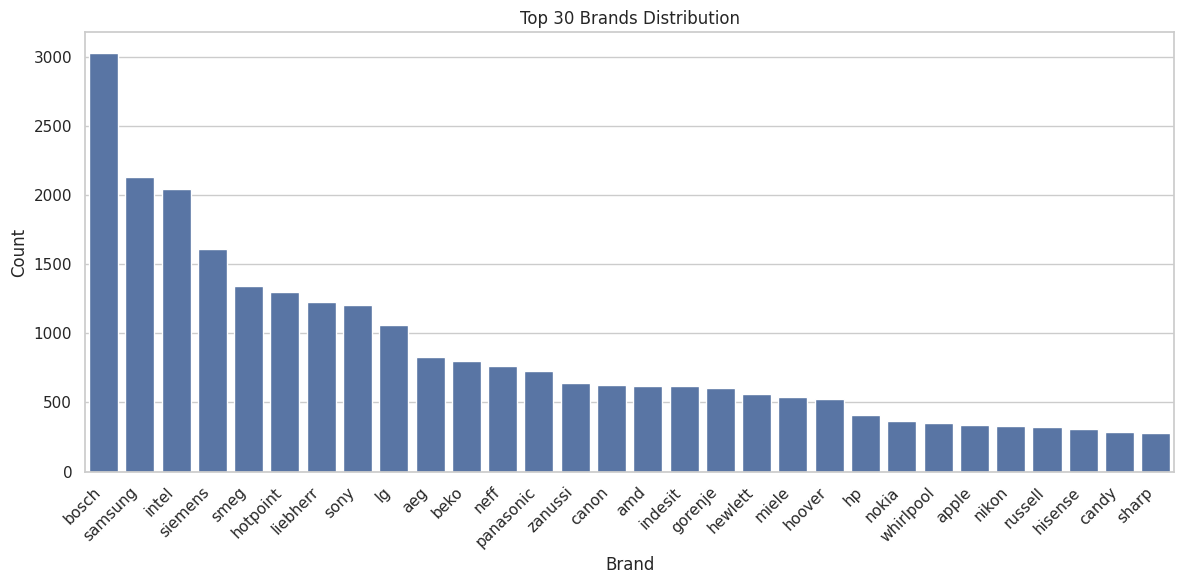

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 30 brands distribution
top_brands = df['brand'].value_counts().nlargest(30).index

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df[df['brand'].isin(top_brands)],
    x='brand',
    order=top_brands
)

plt.xticks(rotation=45, ha='right')
plt.title("Top 30 Brands Distribution")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## Step 12 — Category Distribution

Bar chart displays the distribution of all product categories in the dataset, helping visualize class frequencies and identify potential imbalances before modeling.

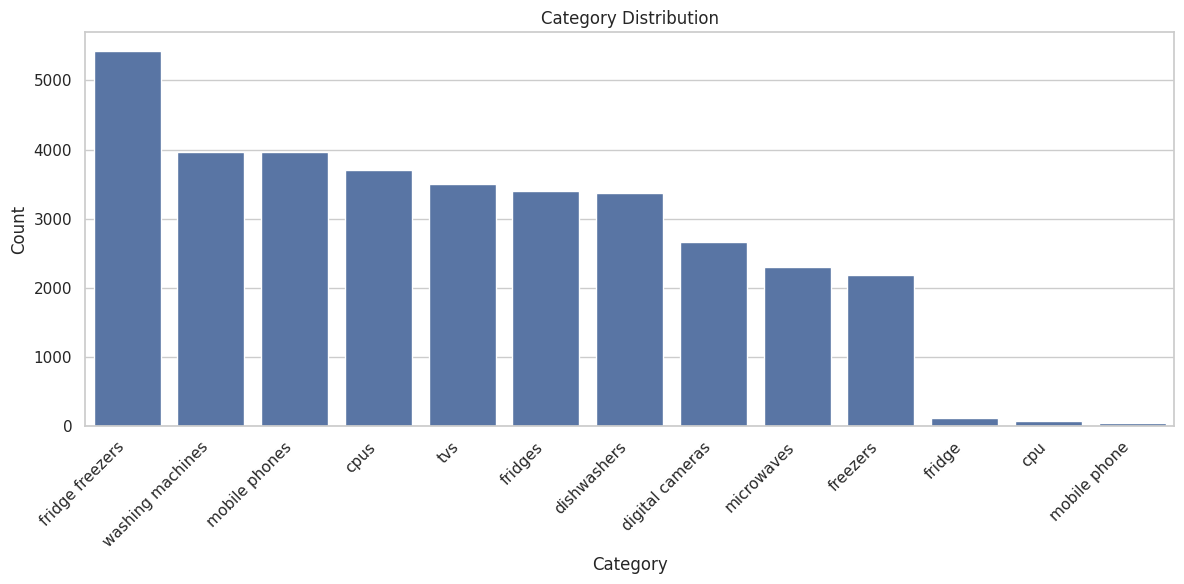

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category_Label', order=df['Category_Label'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
